# us-accident-analysis

Use the "Run" button to execute the code.

In [8]:
!pip install jovian --upgrade --quiet

In [9]:
import jovian

In [10]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vin-alizain/us-accident-analysis


'https://jovian.ai/vin-alizain/us-accident-analysis'

## Exploratory Data Analysis

#### Download Data sets and Import packages

In [11]:

!pip install opendatasets --upgrade --quiet

In [12]:
import opendatasets as od
download_url="https://www.kaggle.com/sobhanmoosavi/us-accidents"
od.download(download_url) #key b136cf49ca51e4eafdf743978835f829

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ali1zain2
Your Kaggle Key: ··········


  2%|▏         | 5.00M/299M [00:00<00:07, 39.0MB/s]

100%|██████████| 299M/299M [00:02<00:00, 127MB/s]


In [35]:
data_filename = './us-accidents/US_Accidents_Dec20.csv'

#### Data Preparation and Cleaning
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values 

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv(data_filename)

In [38]:
df.columns
df.shape

(4232541, 49)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [40]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [41]:
numerics = ['int16' , 'int32' , 'int64' , 'float16' , 'float32' , 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

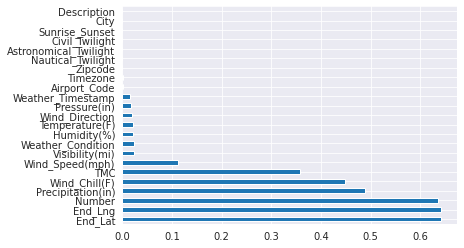

In [42]:
missing_per = df.isna().sum().sort_values(ascending=False)/len(df)
missing_per[missing_per !=0].plot(kind="barh")

#### Exploratory Analysis and Visualization

##### Columns we will analyse
1. City
2. Start Time
3. Start Lat and Start lng
4. Temperature
5. Weather

In [43]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [44]:
"New York" in df.City

False

In [45]:
cities = df.City.unique()
len(cities)

12251

In [46]:
cities_by_accident = df.City.value_counts()
cities_by_accident.head(20)

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

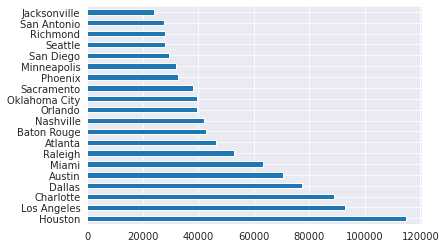

In [47]:
cities_by_accident.head(20).plot(kind="barh")

In [48]:
import seaborn as sns 

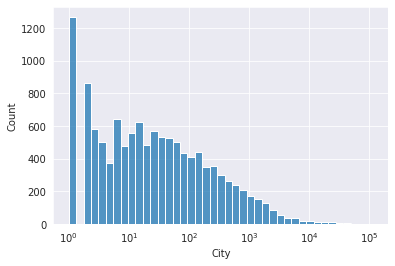

In [49]:
sns.set_style("darkgrid")
sns.histplot(cities_by_accident,log_scale=True)

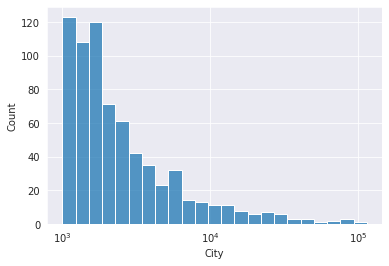

In [50]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000]
low_accident_cities = cities_by_accident[cities_by_accident <1000]  
sns.histplot(high_accident_cities, log_scale=True)

##### Start time

In [51]:
df.Start_Time
df.Start_Time[1] ##YY-MM-DD Time

'2016-02-08 06:07:59'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


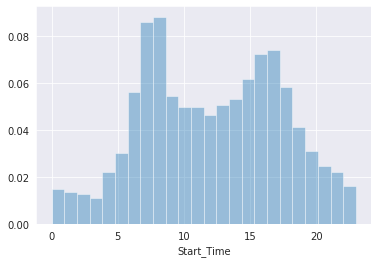

In [52]:
df.Start_Time = pd.to_datetime(df.Start_Time)
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

- Highest percentage of accidents occur between 6am to 10 am 
- Next Highest percentage of accidents occur between 3pm to 6pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


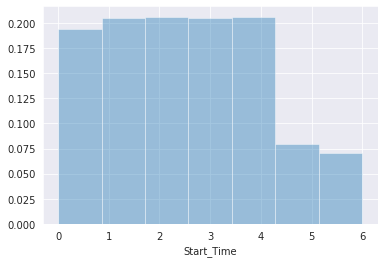

In [53]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


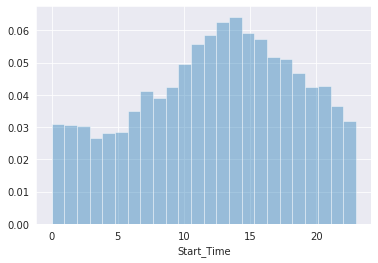

In [54]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


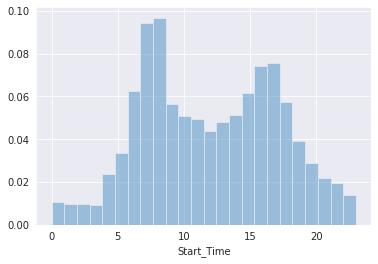

In [55]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


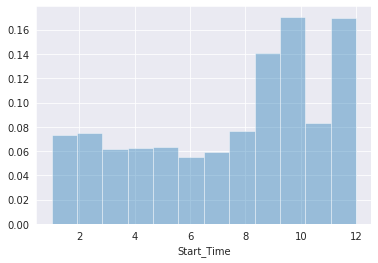

In [67]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == "Bing"]
sns.distplot(df_2019_Bing.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

- Data from year 2016 and 2017 is missing 



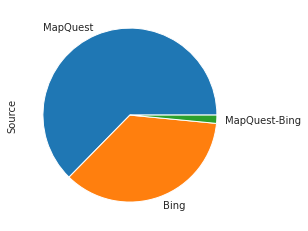

In [68]:
df.Source.value_counts().plot(kind="pie")

#### Start Latitude and Longitude 

In [70]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [72]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

In [91]:
from folium import plugins
from folium.plugins import HeatMap

In [92]:
lat,lng = df.Start_Lat[0], df.Start_Lng[0]
lat, lng


(39.865147, -84.058723)

In [102]:
sample_df = df.sample(int(0.0004 * len(df)))
heatmap_data = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [103]:
map = folium.Map() 
HeatMap(heatmap_data).add_to(map)
map

#### Summary and Conclusions

Insights:
- No data from New York
- Less than 5% of cities have more than 1000 yearly accidents.
- The number of accidents per city decreases exponentially. 
- over 1200 cities have reported just 1 accident 

In [ ]:
jovian.commit(project="us-accident-analysis")